In [ ]:
pip install datasets

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 547.8/547.8 kB 9.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 6.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 316.1/316.1 kB 13.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 39.9/39.9 MB 10.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.9/64.9 kB 3.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 6.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 7.1 MB/s eta 0:00:00
  Attempting uninstall: requests
    Found existing installation: requests 2.31.0
    Uninstalling requests-2.31.0:
      Successfully uninstalled requests-2.31.0
  Attempting uninstall: pyarrow
    Found existing installation: pyarrow 14.0.2
    Uninstalling pyarrow-14.0.2:
      Successfully uninstalled pyarrow-14.0.2
  Attempting uninstall: fsspec
    Found existing installation: fsspec 2024.6.1
    Uninstalling fsspec-2024.6.1:
      

In [ ]:
from datasets import load_dataset

dataset = load_dataset("mstz/covertype", 'covertype')['train']

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


Generating train split:   0%|          | 0/581012 [00:00<?, ? examples/s]

In [ ]:
dataset.to_csv("train.csv")

Creating CSV from Arrow format:   0%|          | 0/582 [00:00<?, ?ba/s]

187886567

In [ ]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.impute import SimpleImputer, KNNImputer
from imblearn.combine import SMOTEENN
from sklearn.ensemble import RandomForestClassifier
from sklearn.decomposition import PCA

import warnings
warnings.filterwarnings('ignore')

In [ ]:
train = pd.read_csv('train.csv')
# remove ID column from set
train = train.iloc[:, 1:]
train.head()

,elevation,aspect,slope,horizontal_distance_to_hydrology,vertical_distance_to_hydrology,horizontal_distance_to_roadways,hillshade_9am,hillshade_noon,hillshade_3pm,horizontal_distance_to_fire_points,...,soil_type_id_31,soil_type_id_32,soil_type_id_33,soil_type_id_34,soil_type_id_35,soil_type_id_36,soil_type_id_37,soil_type_id_38,soil_type_id_39,cover_type
0,2596.0,51.0,3.0,258.0,0.0,510.0,221.0,232.0,148.0,6279.0,...,False,False,False,False,False,False,False,False,False,4
1,2590.0,56.0,2.0,212.0,-6.0,390.0,220.0,235.0,151.0,6225.0,...,False,False,False,False,False,False,False,False,False,4
2,2804.0,139.0,9.0,268.0,65.0,3180.0,234.0,238.0,135.0,6121.0,...,False,False,False,False,False,False,False,False,False,1
3,2785.0,155.0,18.0,242.0,118.0,3090.0,238.0,238.0,122.0,6211.0,...,False,False,False,False,False,False,False,False,False,1
4,2595.0,45.0,2.0,153.0,-1.0,391.0,220.0,234.0,150.0,6172.0,...,False,False,False,False,False,False,False,False,False,4


In [ ]:
train.groupby('cover_type').size()

cover_type
0    211840
1    283301
2     35754
3      2747
4      9493
5     17367
6     20510
dtype: int64

In [ ]:
X = train.drop('cover_type', axis=1)
y = train['cover_type']

In [ ]:
# extract all numerical features from train
num_features = train.iloc[:,0:9]

# extract all binary features from train
cat_features = train.iloc[:, 9:-1]

# Tratamento de Outliers

In [ ]:
# Z-score method
z_scores = np.abs(stats.zscore(num_features))
data_cleaned_zscore = num_features[(z_scores < 3).all(axis=1)]

# IQR method
Q1 = num_features.quantile(0.25)
Q3 = num_features.quantile(0.75)
IQR = Q3 - Q1
data_cleaned_iqr = num_features[~((num_features < (Q1 - 1.5 * IQR)) | (num_features > (Q3 + 1.5 * IQR))).any(axis=1)]

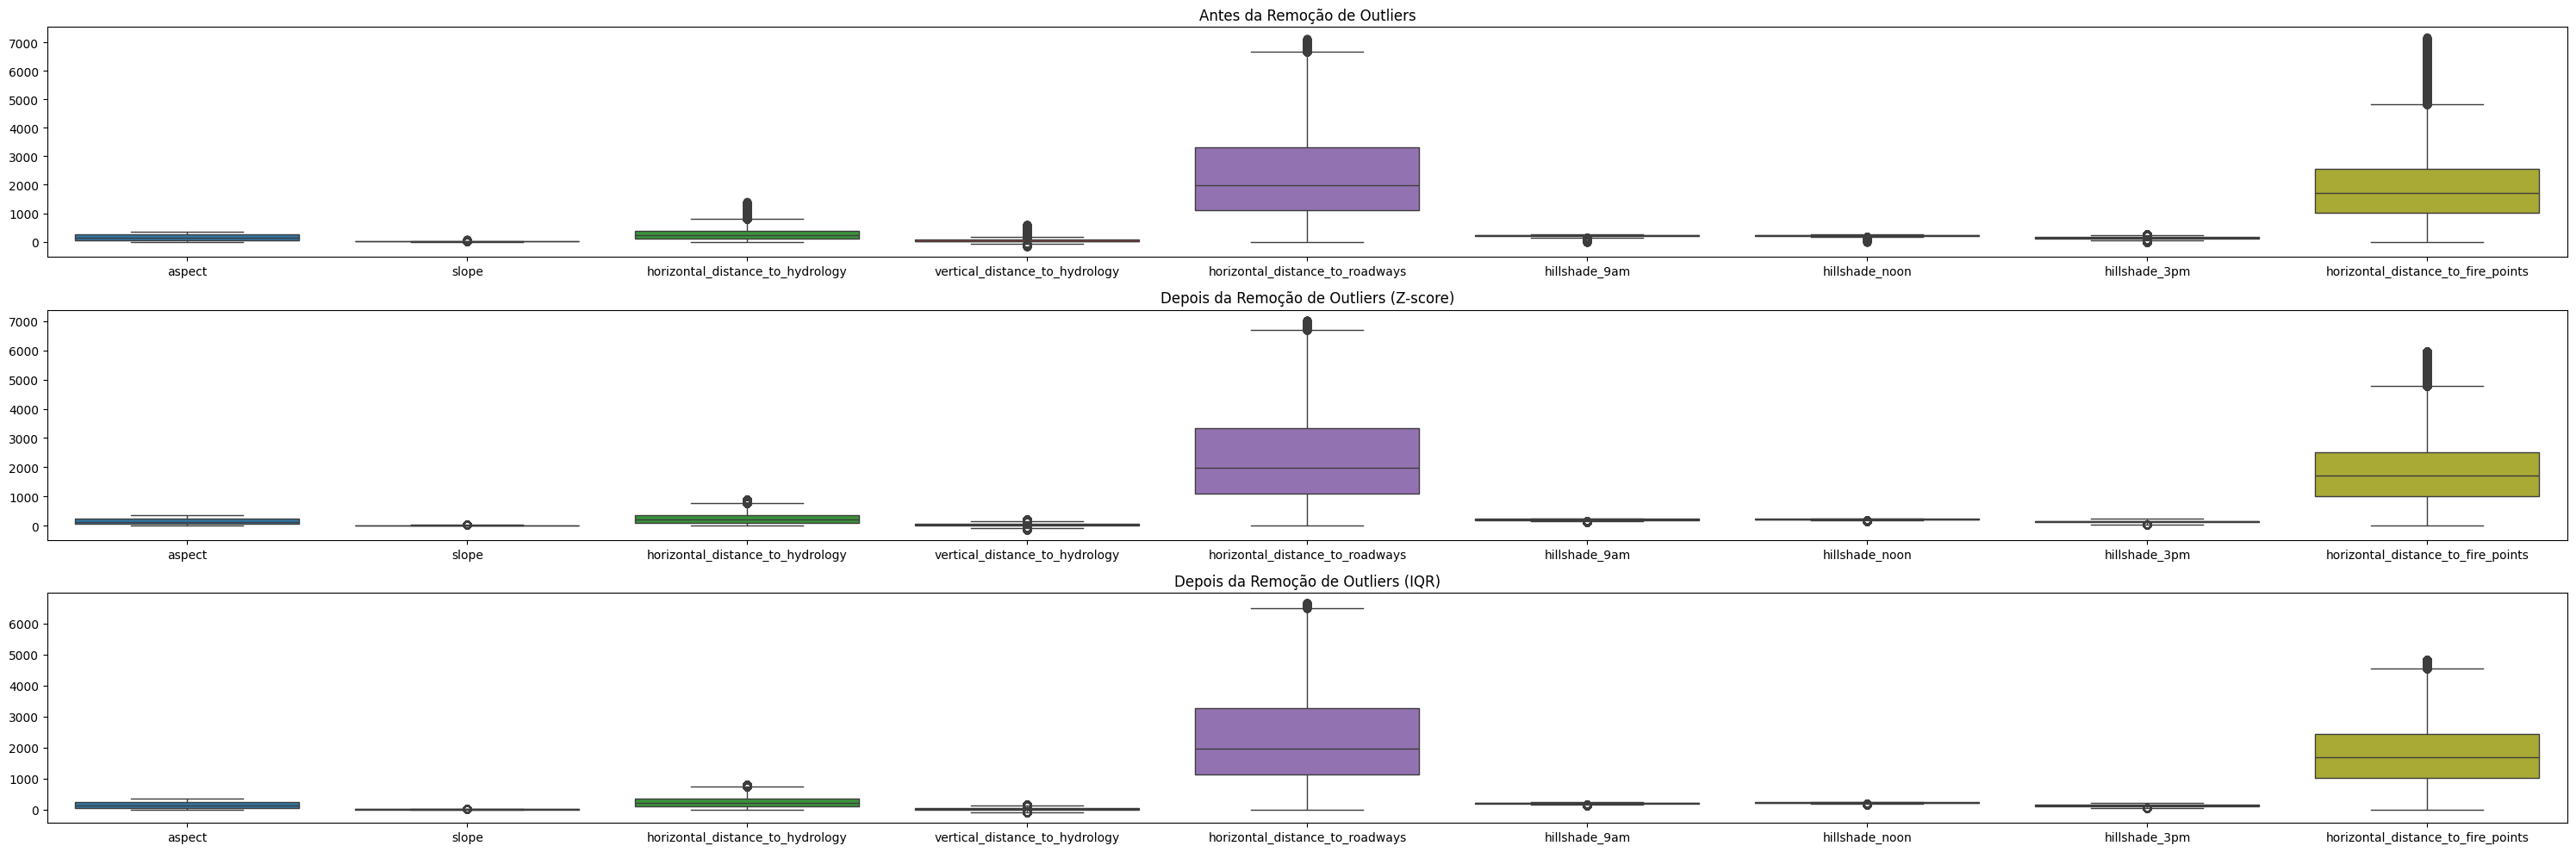

In [ ]:
# Dados antes da remoção de outliers
plt.figure(figsize=(30, 10))
plt.subplot(3, 1, 1)
sns.boxplot(data=num_features)
plt.title('Antes da Remoção de Outliers')

# Dados depois da remoção de outliers (método Z-score)
plt.subplot(3, 1, 2)
sns.boxplot(data=data_cleaned_zscore)
plt.title('Depois da Remoção de Outliers (Z-score)')

# Dados depois da remoção de outliers (método IQR)
plt.subplot(3, 1, 3)
sns.boxplot(data=data_cleaned_iqr)
plt.title('Depois da Remoção de Outliers (IQR)')

plt.tight_layout()
plt.show()

In [ ]:
# Normalização
scaler_minmax = MinMaxScaler(feature_range=(0, 1))
data_normalized = scaler_minmax.fit_transform(data_cleaned_iqr)

data_normalized = pd.DataFrame(data_normalized, columns=data_cleaned_iqr.columns)

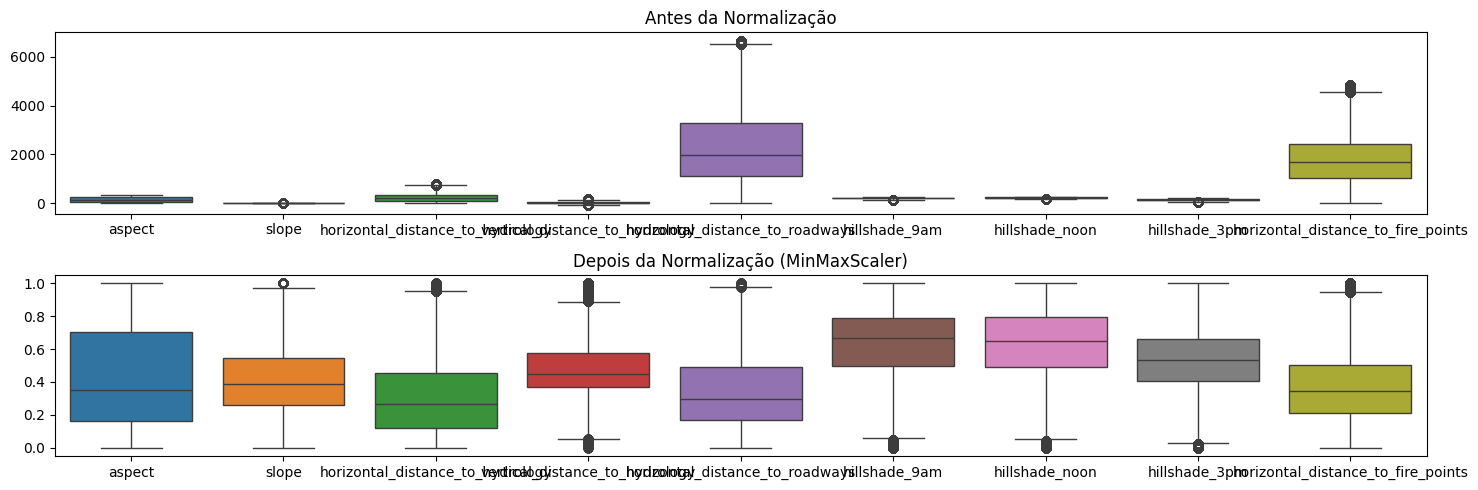

In [ ]:
# Dados antes da normalização
plt.figure(figsize=(15, 5))
plt.subplot(2, 1, 1)
sns.boxplot(data=data_cleaned_iqr)
plt.title('Antes da Normalização')

# Dados depois da normalização
plt.subplot(2, 1, 2)
sns.boxplot(data=data_normalized)
plt.title('Depois da Normalização (MinMaxScaler)')

plt.tight_layout()
plt.show()

In [ ]:
num_features.describe()

,aspect,slope,horizontal_distance_to_hydrology,vertical_distance_to_hydrology,horizontal_distance_to_roadways,hillshade_9am,hillshade_noon,hillshade_3pm,horizontal_distance_to_fire_points
count,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000
mean,155.656807,14.103704,269.428217,46.418855,2350.146611,212.146049,223.318716,142.528263,1980.291226
std,111.913721,7.488242,212.549356,58.295232,1559.254870,26.769889,19.768697,38.274529,1324.195210
min,0.000000,0.000000,0.000000,-173.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,58.000000,9.000000,108.000000,7.000000,1106.000000,198.000000,213.000000,119.000000,1024.000000
50%,127.000000,13.000000,218.000000,30.000000,1997.000000,218.000000,226.000000,143.000000,1710.000000
75%,260.000000,18.000000,384.000000,69.000000,3328.000000,231.000000,237.000000,168.000000,2550.000000
max,360.000000,66.000000,1397.000000,601.000000,7117.000000,254.000000,254.000000,254.000000,7173.000000


In [ ]:
data_normalized.describe()

,aspect,slope,horizontal_distance_to_hydrology,vertical_distance_to_hydrology,horizontal_distance_to_roadways,hillshade_9am,hillshade_noon,hillshade_3pm,horizontal_distance_to_fire_points
count,480375.000000,480375.000000,480375.000000,480375.000000,480375.000000,480375.000000,480375.000000,480375.000000,480375.000000
mean,0.427967,0.418352,0.303853,0.488686,0.350712,0.626709,0.628736,0.534507,0.372871
std,0.308363,0.198168,0.224309,0.161018,0.231370,0.212448,0.216735,0.185969,0.209446
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.163889,0.258065,0.119197,0.366935,0.168593,0.495238,0.493506,0.408840,0.210374
50%,0.350000,0.387097,0.265997,0.447581,0.297403,0.666667,0.649351,0.535912,0.347386
75%,0.701389,0.548387,0.451694,0.576613,0.491968,0.790476,0.792208,0.662983,0.503410
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
